<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_2/assignment_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2.1
Zachariah Freitas



## Question 2

### 2.1

In [130]:
# Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [8]:
# Get data
s_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/shelter_data.csv')

# Resaving as a generic name for reusable code.
df = s_df

s_df.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [13]:
s_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [26]:
# Get Features and corresponding outcomes
feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']

# List down features based on type



training_features = df[feature_names]
outcome_name = ['OutcomeType']
outcome_labels = df[outcome_name]

# Re-engineer Categorical Features

# Create dummy variables from categorical features.
categorical_feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']
training_features = pd.get_dummies(training_features, columns = categorical_feature_names)


# # Re-engineer Numerical Features
# numeric_feature_names = [ 'example', 'example']
# from sklearn.preprocessing  import StandardScaler
# ss = StandardScaler()
# # fit scaler on numeric features
# ss.fit(training_features[numeric_feature_names])
# # scale numeric fearures now
# training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])



# View newly engineered features.
training_features.head(5)


,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,AgeuponOutcome_0 years,AgeuponOutcome_1 day,AgeuponOutcome_1 month,...,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Create a test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training_features,outcome_labels,test_size=0.2)

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [131]:
# Classification Performance Metrics
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.57      0.97      0.72      2169
           Died       0.00      0.00      0.00        40
     Euthanasia       0.00      0.00      0.00       291
Return_to_owner       0.00      0.00      0.00       966
       Transfer       0.73      0.63      0.67      1880

       accuracy                           0.62      5346
      macro avg       0.26      0.32      0.28      5346
   weighted avg       0.49      0.62      0.53      5346



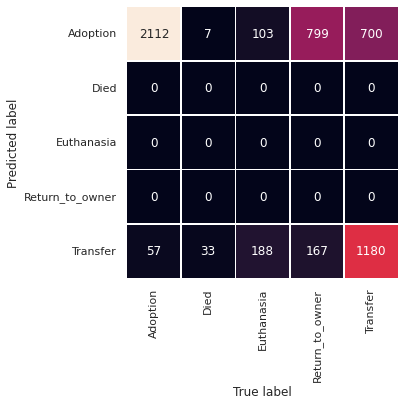

In [108]:
# Visualize the confusion matirx.
def visualize_confusion_matirx(model, y_test, y_pred, ax=None, cmap=None):
  %matplotlib inline
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns; sns.set()
  labels=model.classes_ # Get the unique labels in the model.
  mat = confusion_matrix(y_test, y_pred, labels=labels)
  cm_array_df = pd.DataFrame(mat, index=labels, columns=labels)
  plt.figure(figsize=[5,5])
  sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap=cmap)
  plt.xlabel('True label')
  plt.ylabel('Predicted label');

visualize_confusion_matirx(tree, y_test,y_pred)

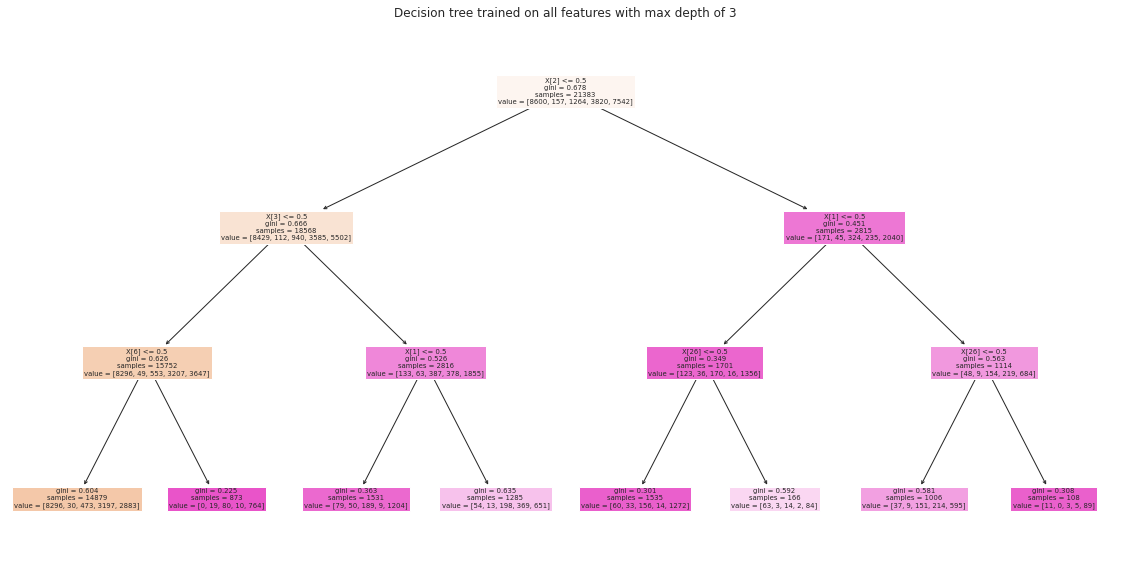

In [101]:
# Visualize the tree.
from sklearn.tree import plot_tree

plt.figure(figsize=[20,10])
plot_tree(tree, filled=True, max_depth=None)
plt.title("Decision tree trained on all features with max depth of 3")
plt.show()

In [127]:
# Vary the decision tree depth in a loop, increasing depth from 3 to 10 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(3, 10 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(x_train, y_train)
    training_error.append(1-accuracy_score(y_train, model_1.predict(x_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(x_train, y_train)
    testing_error.append(1-accuracy_score(y_test, model_2.predict(x_test))) # Save Error Rate = 1-Accuracy



Using matplotlib backend: agg


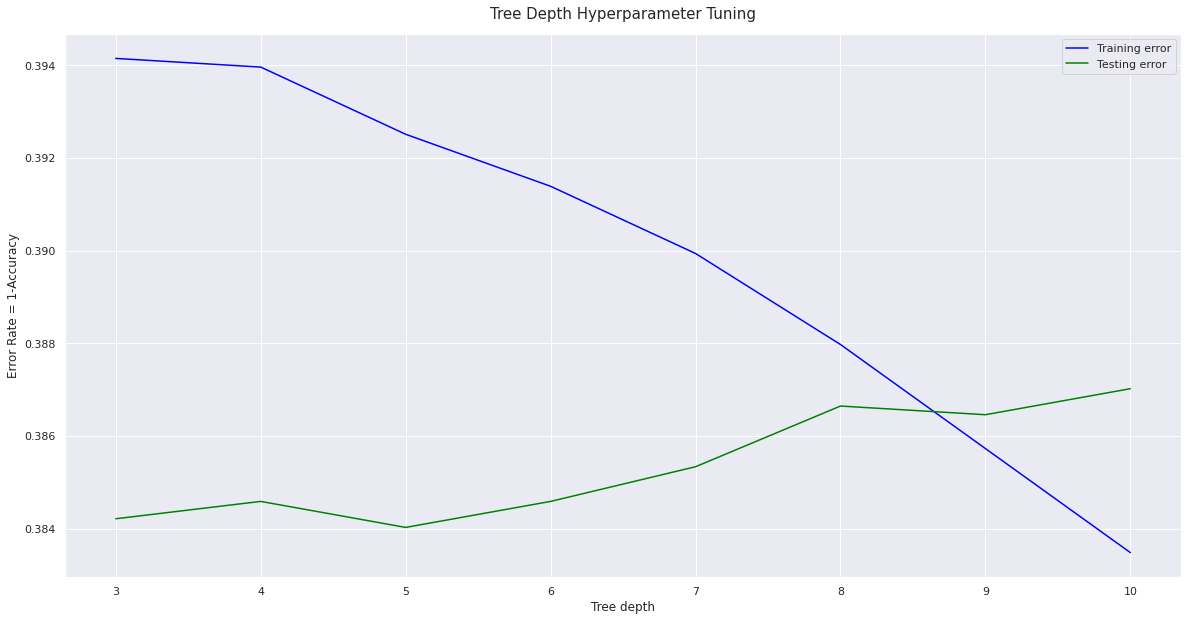

In [129]:
# Make a plot of training and test set error as the decision tree depth is varied.
%matplotlib 
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Error Rate = 1-Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

### Tree depth Hyperparameter Tuning
The picture above is a plot of training and test set error as the decision tree depth is varied from 3 to 10. You can clearly see that as our training error rate improves with each increase in depth but our test error rate slowly begins to deteriorate in performance. This is a demonstration of the variance bias tradeoff.

In [132]:
tree = DecisionTreeClassifier(random_state=0)
path = tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

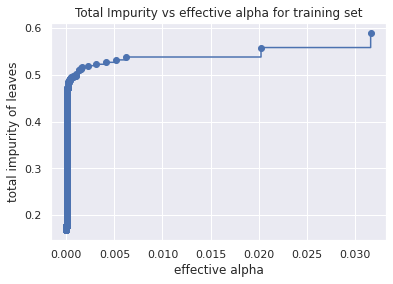

In [133]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [172]:
# Let's check to see if there are nodes in the last apha
# Next, we train a decision tree using the effective alphas. 
# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

trees = []
for ccp_alpha in ccp_alphas[::200]:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train)
    trees.append(tree)
#print(
#    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#        trees[-1].tree_.node_count, ccp_alphas[-1]
#    )
#)

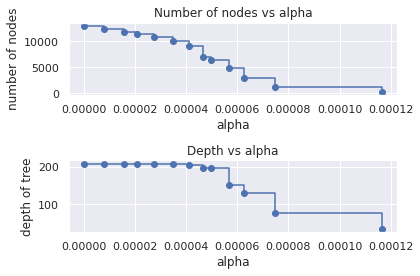

In [173]:
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[::200], node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[::200], depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

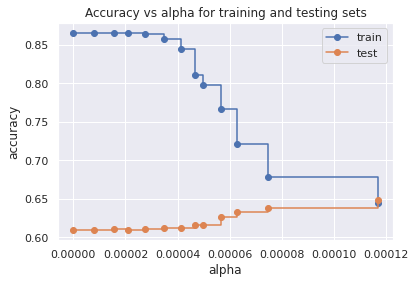

In [174]:
train_scores = [tree.score(x_train, y_train) for tree in trees]
test_scores = [tree.score(x_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[::200], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[::200], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to close to a 100% (~86%) training accuracy and ~61% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.00012 maximizes the testing accuracy.

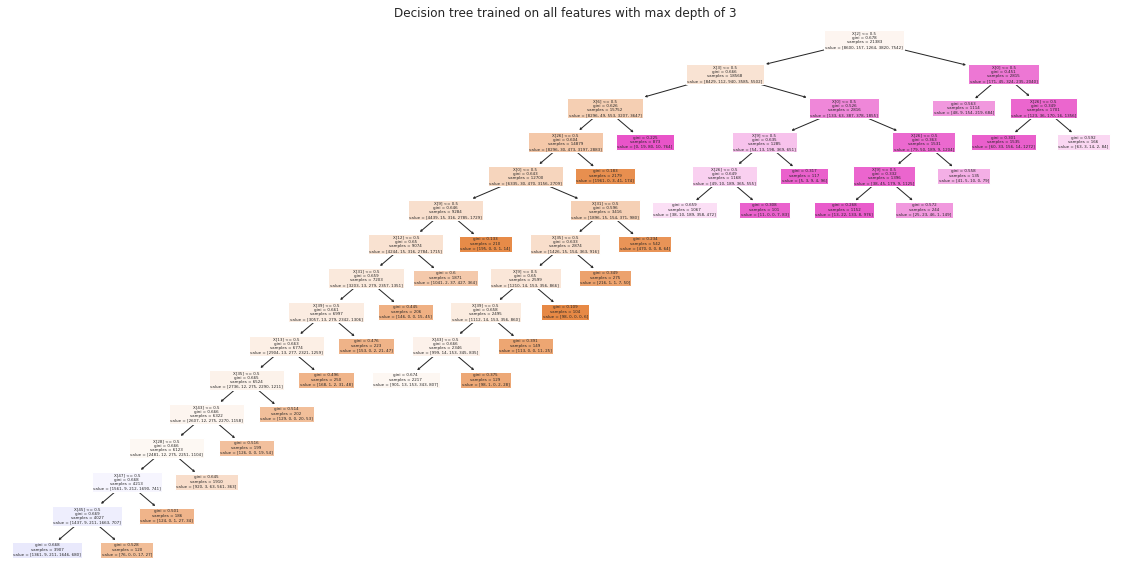

In [176]:
# Plot a pruned decision tree with ccp_apha value of 0.0007
ccp_alpha = 0.0007
treeplot = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(x_train, y_train)

# Visualize the tree.
from sklearn.tree import plot_tree

plt.figure(figsize=[20,10])
plot_tree(treeplot, filled=True, max_depth=None)
plt.title("Decision tree trained on all features with max depth of 3")
plt.show()

Original Tree
Accuracy Score: 0.616 



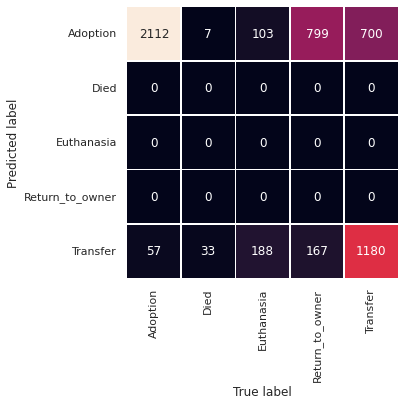

In [185]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
y_pred = tree.predict(x_test)

print('Original Tree')
print('Accuracy Score:', round(accuracy_score(y_test, tree.predict(x_test)),3),'\n')

visualize_confusion_matirx(tree, y_test,y_pred)

Pruned Tree
Accuracy Score: 0.642 



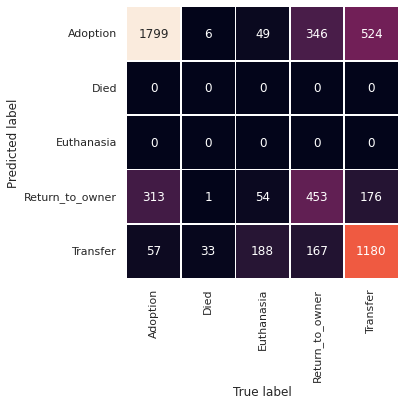

In [184]:
from sklearn.tree import DecisionTreeClassifier
ccp_alpha = 0.0007
tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(x_train, y_train)
y_pred = tree.predict(x_test)

print('Pruned Tree')
print('Accuracy Score:', round(accuracy_score(y_test, tree.predict(x_test)),3),'\n')

visualize_confusion_matirx(tree, y_test,y_pred)

### 2.2


In [ ]:
# Get data
t_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/text_data.csv')
t_df




### 2.3

In [ ]:
# Get data
a_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/audio_data.csv')
a_df




## Question 3
### 3.1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

### 3.2

### 3.3

### 3.5

